In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading cleaned data from preprocessing.
df = pd.read_csv('cleaned_data.csv',parse_dates=True)

In [3]:
df.head(2)

,id,property_type,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,city,description,first_review,...,essential_electronics,security,white_goods,elevator,child_friendly,facilities,hot_tub_sauna_or_pool,pets_allowed,host_active_days,time_since_first_review
0,6901257,Apartment,Entire home/apt,3,1.0,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3156.0,0-6 months
1,6304928,Apartment,Entire home/apt,7,1.0,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1245.0,0-6 months


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73922 entries, 0 to 73921
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       73922 non-null  int64  
 1   property_type            73922 non-null  object 
 2   room_type                73922 non-null  object 
 3   accommodates             73922 non-null  int64  
 4   bathrooms                73922 non-null  float64
 5   cancellation_policy      73922 non-null  object 
 6   cleaning_fee             73922 non-null  bool   
 7   city                     73922 non-null  object 
 8   description              73921 non-null  object 
 9   first_review             58100 non-null  object 
 10  host_has_profile_pic     73922 non-null  int64  
 11  host_identity_verified   73922 non-null  int64  
 12  host_response_rate       73922 non-null  object 
 13  host_since               73922 non-null  object 
 14  instant_bookable      

In [5]:
#Since host_since, first_review, last_review are date objects, converted them into datetime ojbects
df['host_since'] = pd.to_datetime(df['host_since'])
df['first_review'] = pd.to_datetime(df['first_review'])
df['last_review'] = pd.to_datetime(df['last_review'])

### Exploratory Data Analysis

#### Overview of Hosts joining Airbnb and first review for their listings.

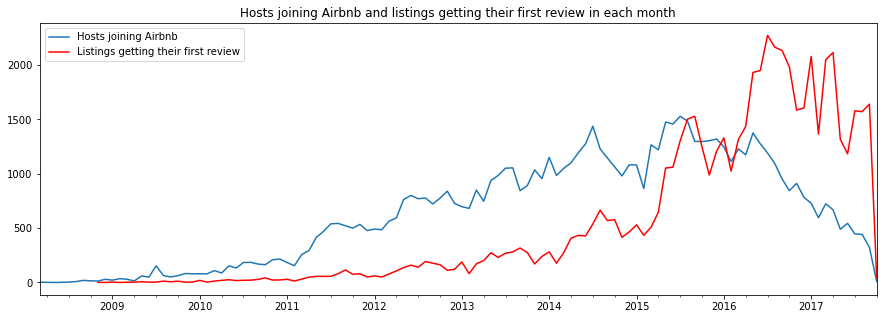

In [6]:
plt.figure(figsize=(15,5))
df.set_index('host_since').resample('MS').size().plot(label='Hosts joining Airbnb')
df.set_index('first_review').resample('MS').size().plot(label='Listings getting their first review',color='red')
plt.title('Hosts joining Airbnb and listings getting their first review in each month')
plt.legend()
plt.xlabel('')
plt.ylabel('')
plt.show()

`The first host joined Airbnb in March 2008, and the recent one in October 2017. An increase in hosts joining has been seen from 2011, had a peak in 2014, but gradually kept decreasing since 2015.
Number of reveiws always had a steady increase through out the data. Marked couple of peaks in 2015 and 2016.`

#### Does the listings have same demand throughout the year?

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

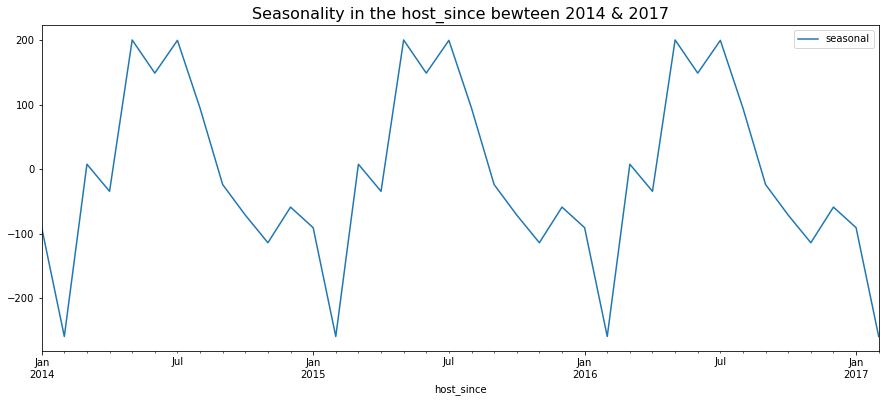

In [8]:
# plotting the seasonal component bewteen 2014 & 2017
plt.figure(figsize=(15,6))
seasonal_decompose(df.set_index('host_since').resample('MS').size()['2014-01-01':'2017-02-01']).seasonal.plot()
plt.title('Seasonality in the host_since bewteen 2014 & 2017', size=16)
plt.legend()
plt.show()

`The above line plot depicts clear seasonality due to the characteristics of the market in the months of June-August. The hosts might have listed their property for incoming tourists during the summer holidays.`

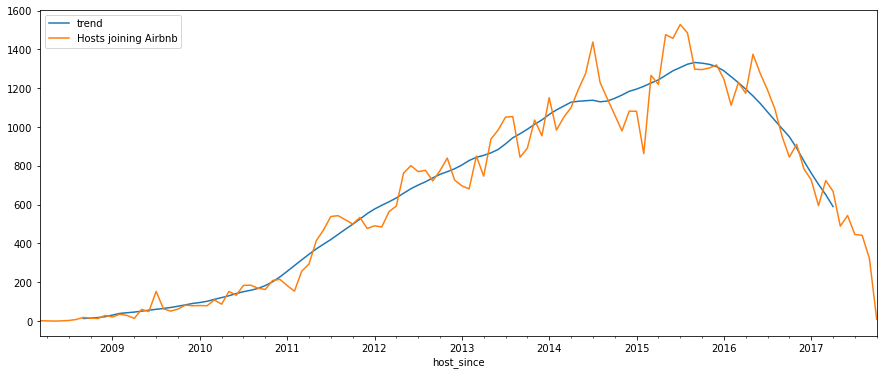

In [9]:
plt.figure(figsize=(15,6))
seasonal_decompose(df.set_index('host_since').resample('MS').size()).trend.plot()
df.set_index('host_since').resample('MS').size().plot(label='Hosts joining Airbnb')
plt.legend(loc=2)
plt.show()

`The above plot shows the trend in the hosts listing their property. The number constantly rose till 2015 and starting decline starting 2016.`

#### similar inspections for first_reviews

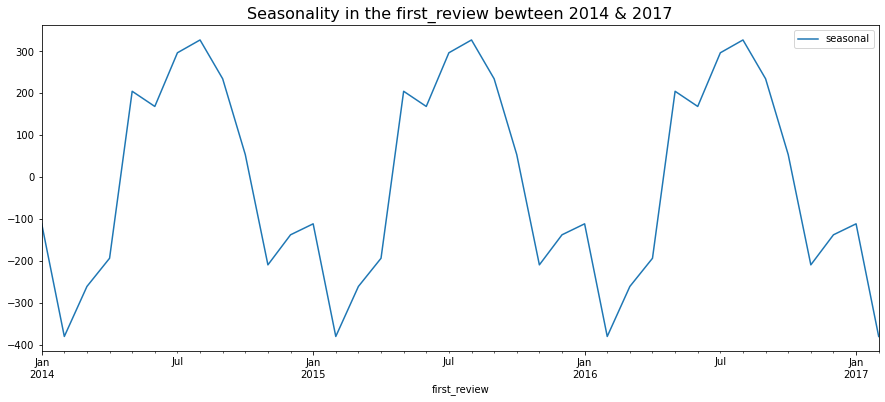

In [10]:
# plotting the seasonal component bewteen 2014 & 2017
plt.figure(figsize=(15,6))
seasonal_decompose(df.set_index('first_review').resample('MS').size()['2014-01-01':'2017-02-01']).seasonal.plot()
plt.title('Seasonality in the first_review bewteen 2014 & 2017', size=16)
plt.legend()
plt.show()

`Similar seasonality with host_since feature. Lot of people wrote the reviews in the months of June-August, assuming that they wrote the reviews as soon as thier stay is completed.`

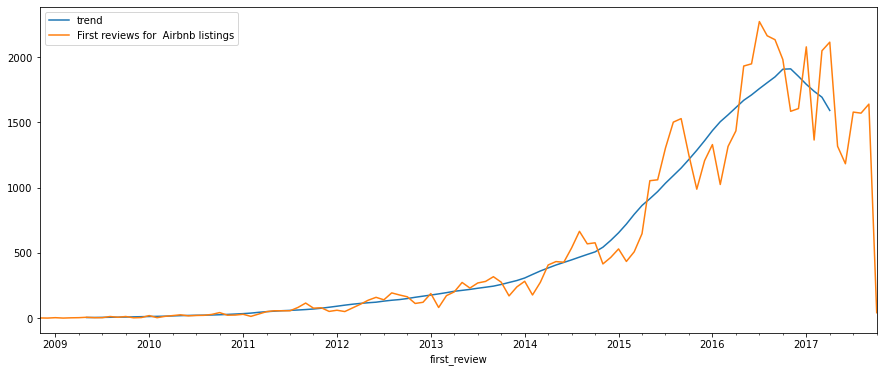

In [11]:
plt.figure(figsize=(15,6))
seasonal_decompose(df.set_index('first_review').resample('MS').size()).trend.plot()
df.set_index('first_review').resample('MS').size().plot(label='First reviews for  Airbnb listings')
plt.legend(loc=2)
plt.show()

`The trend for first_reveiws shows that number of reviews gradually rose till the end of 2016, but started to come down for the first time in 2017, registering a peak in mid 2015 & 2016`

#### How does the price change from one year to another? 

In [12]:
import seaborn as sns

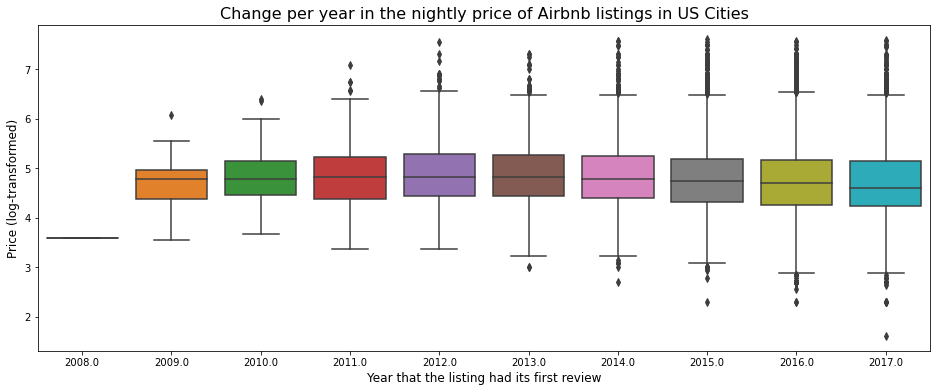

In [13]:
plt.figure(figsize=(16,6))
sns.boxplot(df.first_review.dt.year, df.log_price)
plt.xlabel('Year that the listing had its first review', fontsize=12)
plt.ylabel('Price (log-transformed)', fontsize=12)
plt.title('Change per year in the nightly price of Airbnb listings in US Cities', fontsize=16)
plt.show()

`The price hasn't varied much, instead fluctuated around the median over the years. The price range has increased gradually as the years pass by. `

####  Price distribution

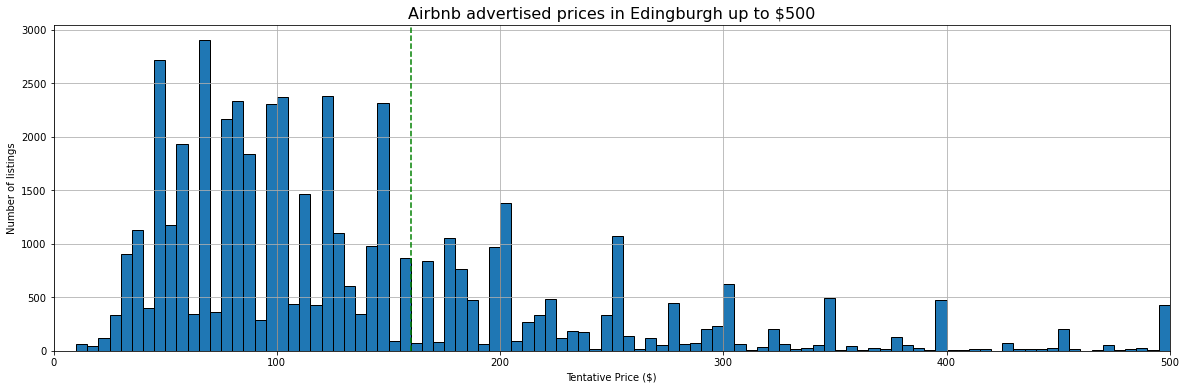

In [14]:
# Distribution of prices from $0 to $500
plt.figure(figsize=(20,6))
np.exp(df['log_price']).hist(bins=100, range=(0,500),edgecolor='black')
plt.margins(x=0)
plt.axvline(np.exp(df['log_price']).mean(), color='green', linestyle='--')
plt.title("Airbnb advertised prices in Edingburgh up to $500", fontsize=16)
plt.xlabel("Tentative Price ($)")
plt.ylabel("Number of listings")
plt.show()

#### As the price available is log_transformed, exponent of that price is taken as tentative price.

`The price distribution is left skewed, showing that most of the listings keep their price less than the mean tentative price. `

### Accomodating how many guests is beneficial?

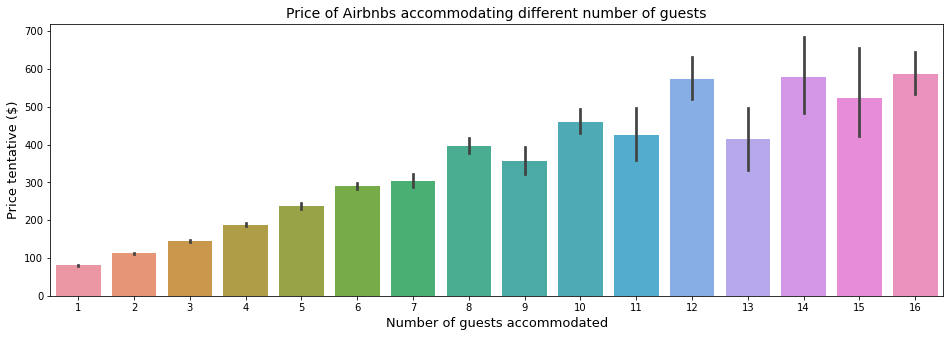

In [15]:
plt.figure(figsize=(16,5))
sns.barplot(df['accommodates'],np.exp(df['log_price']))
plt.title('Price of Airbnbs accommodating different number of guests', fontsize=14)
plt.xlabel('Number of guests accommodated', fontsize=13)
plt.ylabel('Price tentative ($)', fontsize=13)
plt.xticks(rotation=0)
plt.show()

`From the bar graph above, it's evident that accomodating upto 8 guests harness good prices for the listings. `

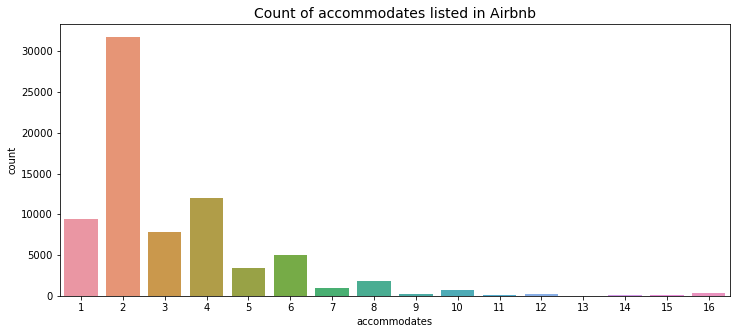

In [16]:
plt.figure(figsize=(12,5))
sns.countplot(df['accommodates'])
plt.title('Count of accommodates listed in Airbnb', fontsize=14)
plt.show()

`Listings accomodating 2 guests has highest number of observations `

#### What type of listing is most preferred?

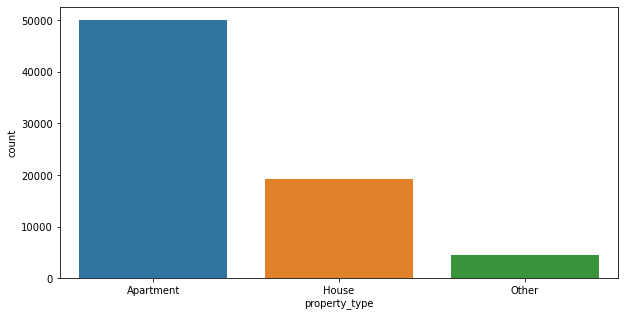

Apartment    0.677768
House        0.260531
Other        0.061700
Name: property_type, dtype: float64


In [17]:
plt.figure(figsize=(10,5))
sns.countplot(df['property_type'])
plt.show()
print(df['property_type'].value_counts(normalize=True))

`Apartments constitute of 68% of the listings, followed by House which has 26% and the rest of the listings are  around 6%`

#### What type of rooms are most listed?

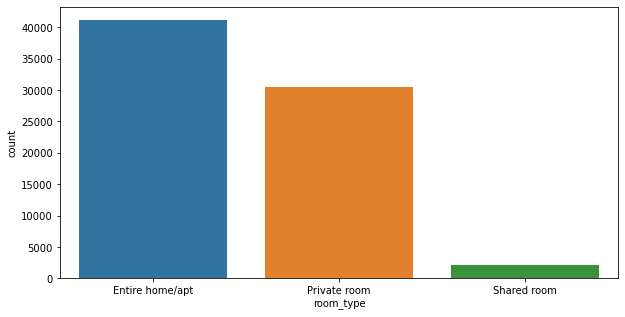

Entire home/apt    0.557655
Private room       0.413125
Shared room        0.029220
Name: room_type, dtype: float64


In [18]:
plt.figure(figsize=(10,5))
sns.countplot(df['room_type'])
plt.show()
print(df['room_type'].value_counts(normalize=True))

`About 55% of listings are entire homes (i.e. you are renting the entire property on your own). Most of the remainder (42%) are private rooms  Fewer than 3% are shared rooms (i.e. you are sharing a room with either the property owner or other guests).`

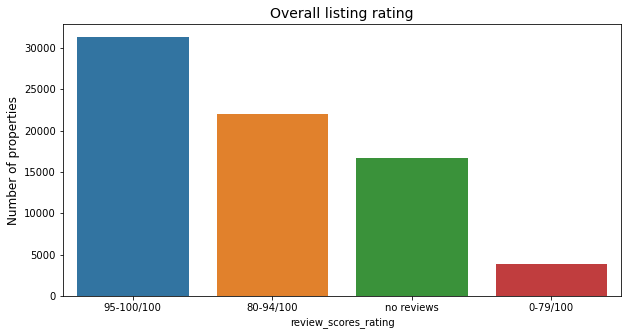

95-100/100    0.423636
80-94/100     0.298423
no reviews    0.225576
0-79/100      0.052366
Name: review_scores_rating, dtype: float64


In [19]:
plt.figure(figsize=(10,5))
sns.countplot(df['review_scores_rating'])
plt.title('Overall listing rating', fontsize=14)
plt.ylabel('Number of properties', fontsize=12)
plt.show()
print(df['review_scores_rating'].value_counts(normalize=True))

`Around 42% of the listings have had a review of 95-100/100. Ratings of 80-94/100 constitute of almost 30%. It's noted that about 22% of listings have not yet been reviewed. 5% of listings have been marked as 0-79/100.`

#### Time difference between first and last reviews of listings

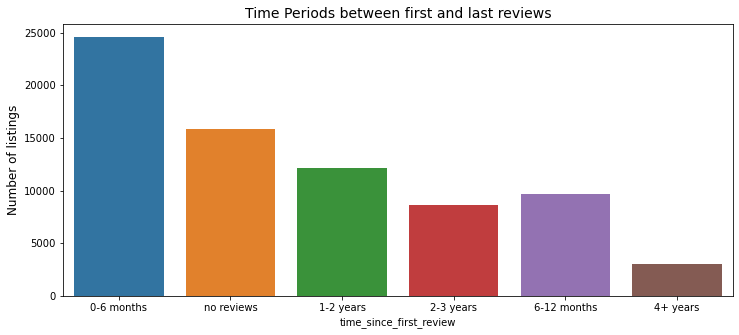

0-6 months     0.332580
no reviews     0.214036
1-2 years      0.164876
6-12 months    0.130502
2-3 years      0.116907
4+ years       0.041097
Name: time_since_first_review, dtype: float64


In [20]:
plt.figure(figsize=(12,5))
sns.countplot(df['time_since_first_review'])
plt.title('Time Periods between first and last reviews', fontsize=14)
plt.ylabel('Number of listings', fontsize=12)
plt.show()
print(df['time_since_first_review'].value_counts(normalize=True))

`Around 33% of listings have 0-6 months of time gap b/w their first and last reviews, this depicts that hosts are adding new listings and are getting reviews for their property. 21% of listings have no review and only 4% of properties are older than 4%.`

#### Identity verification has any effect on the price?

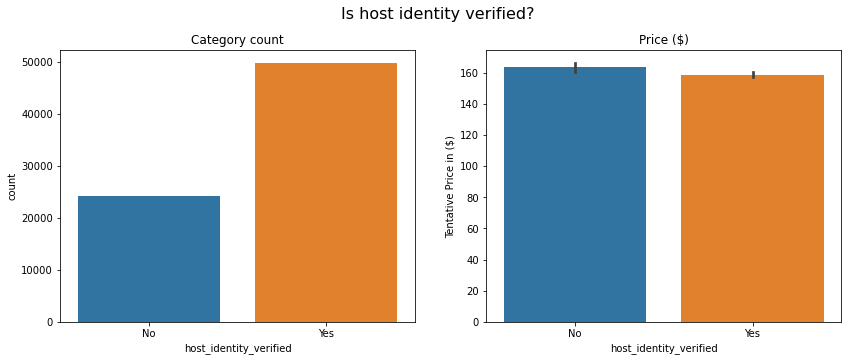

1    0.67298
0    0.32702
Name: host_identity_verified, dtype: float64


In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
fig.suptitle('Is host identity verified?', fontsize=16, y=1)
sns.countplot(df['host_identity_verified'],ax=ax1)
ax1.set_title('Category count')
ax1.set_xticklabels(labels=['No', 'Yes'], rotation=0)

sns.barplot(df['host_identity_verified'], np.exp(df['log_price']),ax=ax2)
ax2.set_xticklabels(labels=['No', 'Yes'], rotation=0)
ax2.set_title('Price ($)')
ax2.set_ylabel('Tentative Price in ($)')
plt.show()

print(df['host_identity_verified'].value_counts(normalize=True))

`68% of hosts have verified their identity and the rest 32% hasn't. Eventhough verifying ones identity is a good practice not only to earn the trust of customers and also to expect better price than the unverified counterparts, contradictingly, there is not much difference in median prices for verified and unverified hosts.`

#### Having instantly bookable listings a better way to earn more?

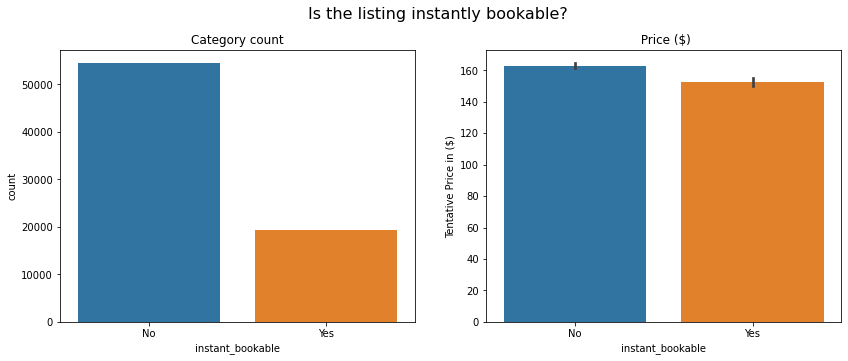

0    0.737467
1    0.262533
Name: instant_bookable, dtype: float64


In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
fig.suptitle('Is the listing instantly bookable?', fontsize=16, y=1)
sns.countplot(df['instant_bookable'],ax=ax1)
ax1.set_title('Category count')
ax1.set_xticklabels(labels=['No', 'Yes'], rotation=0)

sns.barplot(df['instant_bookable'], np.exp(df['log_price']),ax=ax2)
ax2.set_xticklabels(labels=['No', 'Yes'], rotation=0)
ax2.set_title(' Price ($)')
ax2.set_ylabel('Tentative Price in ($)')
plt.show()

print(df['instant_bookable'].value_counts(normalize=True))

`About 26% of the listings are instantly bookable, the rest of 74% has to be booked in advance. 
Moreover, having instant booking facilities are little cheaper than the advanced booking ones.`

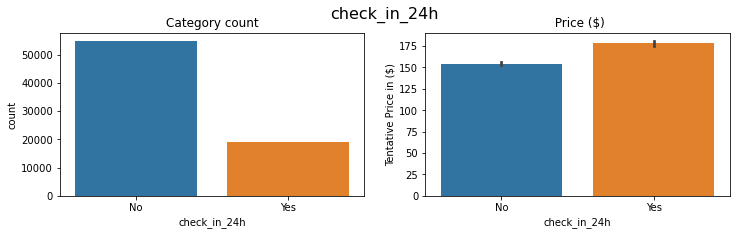

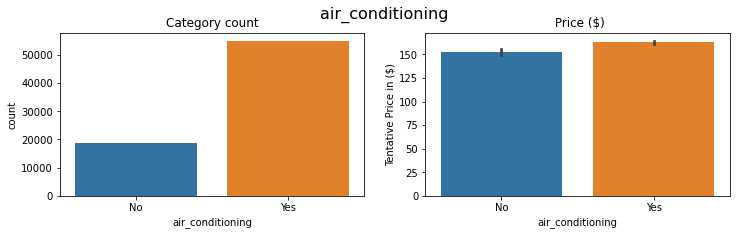

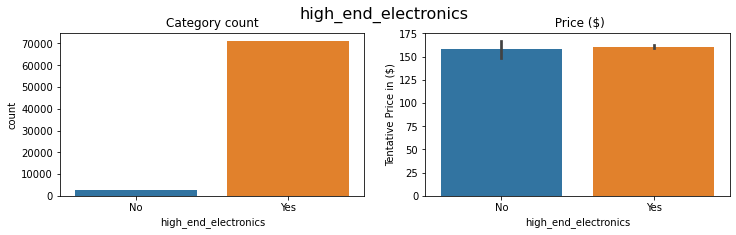

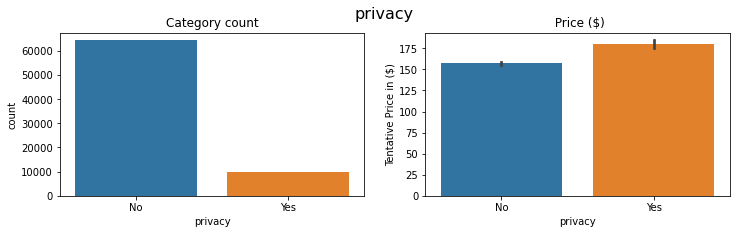

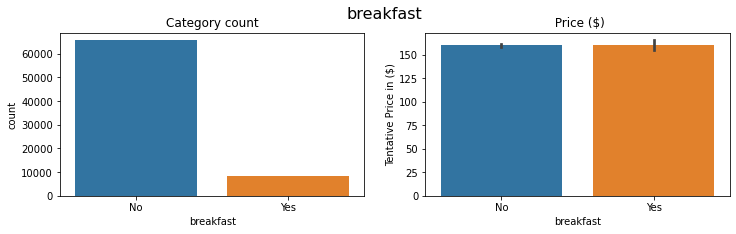

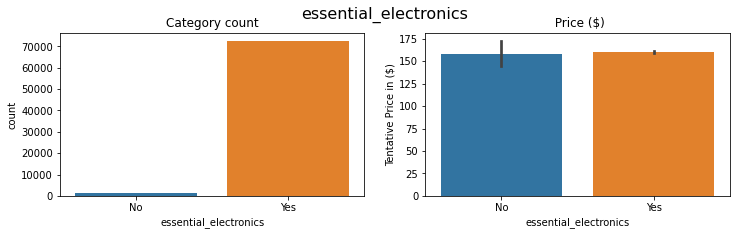

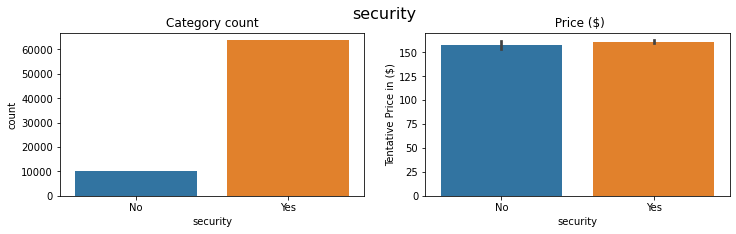

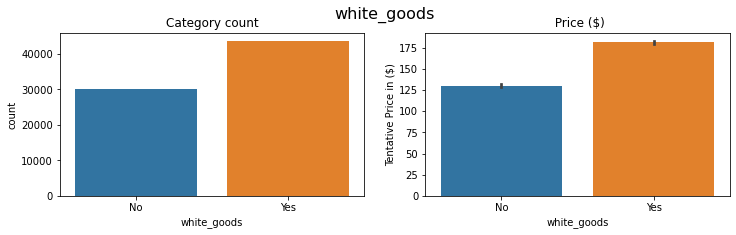

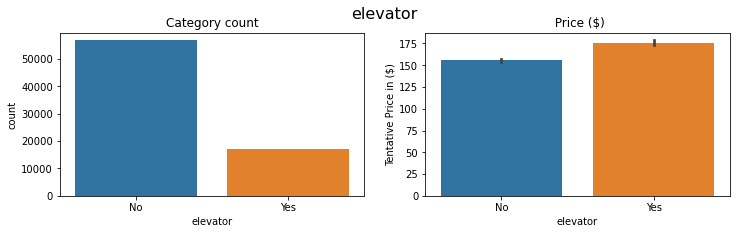

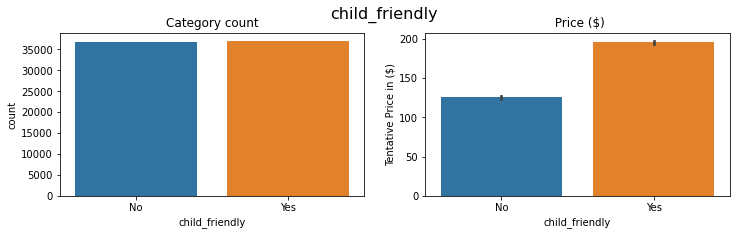

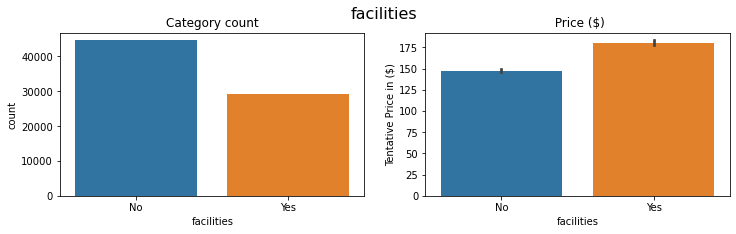

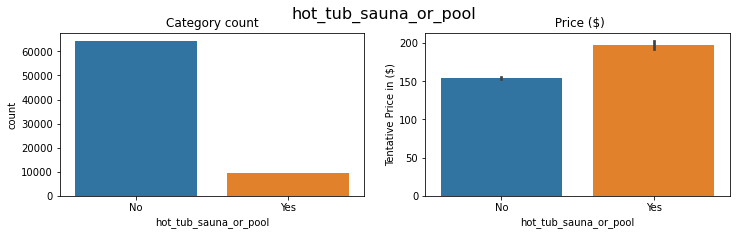

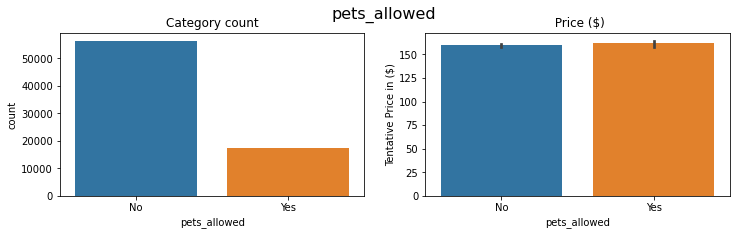

In [25]:
for i in df.iloc[:,26:-2].columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,3))
    fig.suptitle(i, fontsize=16, y=1)
    sns.countplot(df[i],ax=ax1)
    ax1.set_title('Category count')
    ax1.set_xticklabels(labels=['No', 'Yes'], rotation=0)
    
    sns.barplot(df[i], np.exp(df['log_price']),ax=ax2)
    ax2.set_xticklabels(labels=['No', 'Yes'], rotation=0)
    ax2.set_title(' Price ($)')
    ax2.set_ylabel('Tentative Price in ($)')
    
plt.show()

`-> Only 25% of listings have 24 hour check-in facility - Having this facility definitely get's you better price than the one that doesn't have it.
-> 86% of the listings doesn't include private spaces - Having private spaces contribute to higher prices.
-> Most of the listings on Airbnb have high end electronics but unfortunately they do not improve the price of the listings.
-> 75% of the listings are air conditioned. Spaces with this facility are little costlier than it's counterpart.
-> Almost 90% of the spaces don't offer breakfast and it has no effect on the price.
-> Around 60% of the listings include white goods (Washer, dryer and/or dishwasher). As expected, listings with these facilities are costiler.
-> Almost 75% of the listings are not equipped with an elevator - Prices are higher for those with this facilities.
-> Almost 88% of the spaces don't have hot tubs, sauna or pool. Prices are certainly higher with these included.
-> 75% of the listings don't allow pets, may be due to the fact that the property is damaged. Prices are similar both the categories.`